<a href="https://colab.research.google.com/github/RohitNegi12/Guided-projects/blob/main/Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

In [ ]:
!pip install datasets

In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.17.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
from datasets import load_dataset

ds = load_dataset("mteb/emotion")

In [ ]:
train=ds['train']
test=ds['test']
val=ds['validation']


In [ ]:
from collections import defaultdict

def get_tweets_most_efficient(data):
    tweets = []
    labels = []
    label_txt = []
    label_mapping = {}

    for item in data:
        tweets.append(item['text'])
        label = item['label']
        label_text = item['label_text']

        labels.append(label)
        label_txt.append(label_text)

        label_mapping[label_text]=(label)

    return tweets, labels, label_txt, label_mapping

# Usage
tweets, labels, label_txt, label_mapping = get_tweets_most_efficient(train)



In [ ]:
label_mapping

{'sadness': 0, 'anger': 3, 'love': 2, 'surprise': 5, 'fear': 4, 'joy': 1}

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

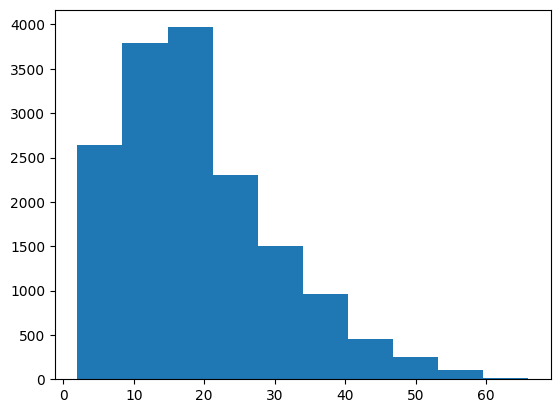

In [ ]:
lengths=[len(t.split(' ')) for t in tweets]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

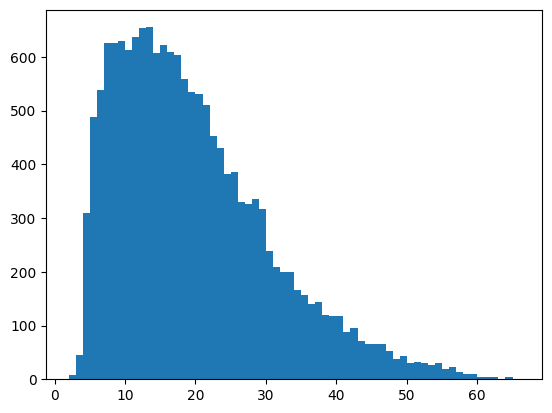

In [ ]:
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [ ]:
maxlen=50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer,tweets):
    sequences=tokenizer.texts_to_sequences(tweets)
    padded_sequences=pad_sequences(sequences,maxlen=maxlen,padding='post',truncating='post')
    return padded_sequences

In [ ]:
padded_train_seq=get_sequences(tokenizer,tweets)

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

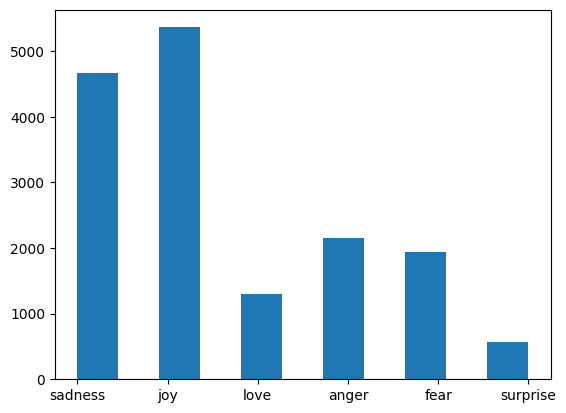

In [ ]:
plt.hist(labels,bins=11)
plt.xticks(ticks=[label_mapping[i] for i in label_mapping.keys()], labels=[i for i in label_mapping.keys()])
plt.show()

In [ ]:
classes=set(label_txt)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [ ]:
classes_to_index=dict((c,i) for i,c in enumerate(classes))
index_to_classes=dict((c,i) for i,c in classes_to_index.items())

In [ ]:
classes_to_index
index_to_classes

{0: 'joy', 1: 'surprise', 2: 'fear', 3: 'sadness', 4: 'anger', 5: 'love'}

In [ ]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])
train_labels=names_to_ids(label_txt)

numpy.ndarray

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
val_tweets,val_labels,val_label_txt,val_label_map=get_tweets_most_efficient(val)
val_seq=get_sequences(tokenizer,val_tweets)


In [ ]:
model.fit(padded_train_seq,
          np.array(labels),
          validation_data=(val_seq,np.array(val_labels)),
          epochs=20,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2),
                    ]
          )

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.3667 - loss: 1.5768 - val_accuracy: 0.5855 - val_loss: 1.0923
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.5914 - loss: 1.0368 - val_accuracy: 0.6370 - val_loss: 0.9452
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.6988 - loss: 0.8029 - val_accuracy: 0.7760 - val_loss: 0.7097
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 67ms/step - accuracy: 0.8392 - loss: 0.5122 - val_accuracy: 0.8220 - val_loss: 0.5837
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.8919 - loss: 0.3674 - val_accuracy: 0.8460 - val_loss: 0.4953
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9151 - loss: 0.2800 - val_accuracy: 0.8635 - val_loss: 0.4542
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 73ms/step - accuracy: 0.9378 - loss: 0.2075 - val_accuracy: 0.8705 - val_loss: 0.4536
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.9441 - loss: 0.1767 - 

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

In [ ]:
test_tweets,test_labels,test_label_txt,test_label_map=get_tweets_most_efficient(test)
test_seq=get_sequences(tokenizer,test_tweets)

In [ ]:
model.